# Two Particles Case (Euler and Symplectic)

In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi,sqrt

#function
def f(a,b):
    r = b-a
    r = sqrt(r[0]**2+r[1]**2)
    #r = sqrt(np.dot(r,r))
    return (G*m*(b-a))/(r**3)
def euler(x,v):
    x_k = x
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                x[i] += v[i]*dt
                v[i] += f(x_k[i],x_k[j])*dt
    return x,v
def symplectic(x,v):
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                v[i] += f(x[i],x[j])*dt
                x[i] += v[i]*dt
    return x,v
def init_two():
    x1 = ([R*cos(omega*t0),R*sin(omega*t0)])
    x2 = -np.copy(x1)
    v1 = ([omega*x1[1],omega*x1[0]])
    v2 = -np.copy(v1)
    x = np.array([x1,x2])
    v = np.array([v1,v2])
    return x,v

In [ ]:
#parameter
m = 1. #kg
R = 2. #m
G = 6.67 #m/s^2
omega = sqrt((G*m)/(4*R**3)) #velocity
Period0=(2*np.pi)/omega
t0 = 0.
t = 30
Period = t/Period0
N = 100
dt = t/N
scale = 2*R
n_particles = 2

#initial condition
x,v = init_two()

#main loop
print(x,Period)
t = t0
xe = ([R*cos(omega*t),R*sin(omega*t)],[-R*cos(omega*t),-R*sin(omega*t)])
xe = np.array(xe)
for k in range(N):
    plt.plot(x[:,0],x[:,1], 'r.')
    plt.plot(xe[:,0],xe[:,1], 'b.')
    t = k*dt
    #plt.close('all')
    x,v = euler(x,v)
    xe = ([R*cos(omega*t),R*sin(omega*t)],[-R*cos(omega*t),-R*sin(omega*t)])
    xe = np.array(xe)
    plt.plot(x[:,0],x[:,1], 'r.')
    #plt.plot(xe[:,0],xe[:,1], 'b.')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    #filename='./figures/fig'+str(k)+'.png'
    #plt.savefig(filename)
    #plt.axes(aspect='equal')
plt.plot(x[:,0],x[:,1], 'r.', label="Euler")
plt.plot(xe[:,0],xe[:,1], 'b.', label="Exact")
leg = plt.legend(loc='upper right', ncol=1, shadow=False, fancybox=True)
leg.get_frame().set_alpha(0.5)
inText = 'dt = ' + str(dt)
plt.grid(b=1, ls='--')
plt.title('Plot Euler vs Exact')
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.text(-scale+.5, -scale+.5, inText, fontsize = 12, bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("plot.png")
plt.show()

In [ ]:
m = 1. #kg
R = 2. #m
G = 6.7 #m/s^2
omega = sqrt((G*m)/(4*R**3)) #velocity
(2*np.pi)/omega
400/13.7

## Error Plot

In [ ]:
#parameter
m = 2. #kg
R = 2. #m
G = 9.8 #m/s^2
omega = sqrt((G*m)/(4*R**3))
t0 = 0.
t = 5.
Nlist = [10,20,30,50,100]

#initial condition
p1 = np.array([R*cos(omega*t0),R*sin(omega*t0)])
p2 = -np.copy(p1)
v1 = np.array([omega*p1[1],omega*p1[0]])
v2 = -np.copy(v1)

#main loop
for N in Nlist:
    dt = t/N
    for k in range(N):
        t = t0+k*dt
        p1,p2,v1,v2 = euler(p1,p2,v1,v2)
        p1e = [R*cos(omega*t),R*sin(omega*t)]
        p2e = [-R*cos(omega*t),-R*sin(omega*t)]
    err = (np.abs(p1-p1e))
    #print(dt,err)

# Many Body Case (Euler and Sympletic)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi,sqrt,exp

def f(a,b):
    r = b-a
    r = sqrt(r[0]**2+r[1]**2)
    #r = sqrt(np.dot(r,r))
    return (G*m*(b-a))/(r**3)

def euler(x,v):
    x_k = x
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                x[i] += v[i]*dt
                v[i] += f(x_k[i],x_k[j])*dt
    return x,v

def symplectic(x,v):
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                v[i] += f(x[i],x[j])*dt
                x[i] += v[i]*dt
    return x,v

def eulermod(x,v):
    x_k = x
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                x[i] += v[i]*dt
                v[i] += f(x_k[i],x_k[j])*dt
        if (abs(x[i,0]) > scale) or (abs(x[i,0] < -scale)):
            v[i,0] = -v[i,0]
            x[i,0] += v[i,0]*dt
        if (abs(x[i,1]) > scale) or (abs(x[i,1] < -scale)):
            v[i,1] = -v[i,1]
            x[i,1] += v[i,1]*dt
    return x,v

def init_two():
    n_particles = 2
    x1 = ([R*cos(omega*t0),R*sin(omega*t0)])
    x2 = -np.copy(x1)
    v1 = ([omega*x1[1],omega*x1[0]])
    v2 = -np.copy(v1)
    x = np.array([x1,x2])
    v = np.array([v1,v2])
    return x,v

def get_init_coordinates():
    x = np.zeros((n_particles,d))
    for i in range(n_particles):
        if (i%2):
            x[i] = ([R*cos(omega*t0),R*sin(omega*t0)])
        elif (i%2==0):
            x[i] = ([-R*cos(omega*t0),-R*sin(omega*t0)])
    return x

def get_init_coordinates2():
    x = np.zeros((n_particles,d))
    for i in range(n_particles):
        if (i%2):
            x[i] = ([i*R*cos(omega*t0),i*R*sin(omega*t0)])
        elif (i%2==0):
            x[i] = ([-i*R*cos(omega*t0),-i*R*sin(omega*t0)])
    return x

def get_coordinates():
    x = np.zeros((n_particles,d))
    for i in range(n_particles):
        rho = np.random.rand()
        x[i] = ([R*exp(rho)*exp(cos(omega*t0)),R*exp(rho)*exp(sin(omega*t0))])
    return x

def get_init_velocities():
    v = np.zeros((n_particles,d))
    for i in range(n_particles):
        v[i] = ([0.0,0.0])
    return v

68.81164575293398 6881
[[-2. -0.]
 [ 2.  0.]]


/Users/alifian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


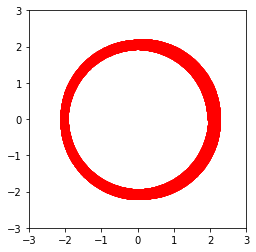

In [2]:
#parameter
m = 1. #kg
R = 2. #m
G = 6.67 #m/s^2
omega = sqrt((G*m)/(4*R**3)) #velocities
d = 2 #dimension
n_particles = 2 #particles
t0 = 0.
t = 5*2.0*pi/omega
dt = 0.01
N = np.int(np.floor(t/dt))
scale = 1.5*R
print(t,N)
#initial condition
#x,v = init_two()
x = get_init_coordinates()
v = get_init_velocities()
#main loop
print(x)
for k in range(N):
    #plt.close('all')
    x,v = eulermod(x,v)
    plt.plot(x[:,0],x[:,1], 'ro')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    #filename='./figures/fig'+str(k)+'.png'
    #plt.savefig(filename)
    plt.axes(aspect='equal')
plt.show()

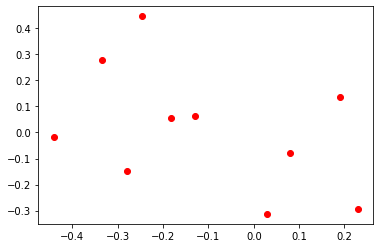

ValueError: operands could not be broadcast together with shapes (10,) (2,) 

In [6]:
d = 2 #dimension
n_particles = 10 #particles
x = np.zeros((n_particles,d))
mu, sigma = 0, 0.1 # mean and standard deviation
x[:,0] = R*np.random.normal(mu, sigma, n_particles)
x[:,1] = R*np.random.normal(mu, sigma, n_particles)
m = np.random.normal(mu, sigma, n_particles)
plt.plot(x[:,0],x[:,1], 'ro')
plt.show()
v = get_init_velocities()
dt = 0.01

for k in range(100):
    plt.close('all')
    x,v = euler(x,v)
    plt.plot(x[:,0],x[:,1], 'ro')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    filename='./figures/fig'+str(k)+'.png'
    plt.savefig(filename)
    #plt.axes(aspect='equal')
plt.show()

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
R*np.random.normal(mu, sigma, 1000)

In [ ]:
#plt.quiver(x,y,vx,vy)
#filename='./figures/fig'+str(i)+'.png'
#plt.savefig(filename)